In [1]:
%ls

In [2]:
import warnings
warnings.filterwarnings("ignore")
import itertools
import lightgbm as lgb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_profiling as pdp
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import KFold, train_test_split

# データ読み込み

In [3]:
%time
file_name = "../python_codes/data/SkillCraft1_Dataset.csv"
df = pd.read_csv(file_name, header=0, index_col=None, sep=',')

Wall time: 0 ns


In [4]:
# レポート作成
pdp.ProfileReport(df)

Number of variables,20
Number of observations,3395
Total Missing (%),0.0%
Total size in memory,530.5 KiB
Average record size in memory,160.0 B
Numeric,17
Categorical,3
Date,0
Text (Unique),0
Rejected,0
Distinct count,3374


In [5]:
# 行数列数
df.shape

(3395, 20)

In [6]:
# ヘッダ
df.head(3)

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001194,5,0.0,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.0,0.000189


In [7]:
# カラムの型
df.dtypes

GameID                    int64
LeagueIndex               int64
Age                      object
HoursPerWeek             object
TotalHours               object
APM                     float64
SelectByHotkeys         float64
AssignToHotkeys         float64
UniqueHotkeys             int64
MinimapAttacks          float64
MinimapRightClicks      float64
NumberOfPACs            float64
GapBetweenPACs          float64
ActionLatency           float64
ActionsInPAC            float64
TotalMapExplored          int64
WorkersMade             float64
UniqueUnitsMade           int64
ComplexUnitsMade        float64
ComplexAbilitiesUsed    float64
dtype: object

In [8]:
# 基本統計量
df.describe()

,GameID,LeagueIndex,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
count,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000
mean,4805.012371,4.184094,117.046947,0.004299,0.000374,4.364654,0.000098,0.000387,0.003463,40.361562,63.739403,5.272988,22.131664,0.001032,6.534021,0.000059,0.000142
std,2719.944851,1.517327,51.945291,0.005284,0.000225,2.360333,0.000166,0.000377,0.000992,17.153570,19.238869,1.494835,7.431719,0.000519,1.857697,0.000111,0.000265
min,52.000000,1.000000,22.059600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000679,6.666700,24.093600,2.038900,5.000000,0.000077,2.000000,0.000000,0.000000
25%,2464.500000,3.000000,79.900200,0.001258,0.000204,3.000000,0.000000,0.000140,0.002754,28.957750,50.446600,4.272850,17.000000,0.000683,5.000000,0.000000,0.000000
50%,4874.000000,4.000000,108.010200,0.002500,0.000353,4.000000,0.000040,0.000281,0.003395,36.723500,60.931800,5.095500,22.000000,0.000905,6.000000,0.000000,0.000020
75%,7108.500000,5.000000,142.790400,0.005133,0.000499,6.000000,0.000119,0.000514,0.004027,48.290500,73.681300,6.033600,27.000000,0.001259,8.000000,0.000086,0.000181
max,10095.000000,8.000000,389.831400,0.043088,0.001752,10.000000,0.003019,0.004041,0.007971,237.142900,176.372100,18.558100,58.000000,0.005149,13.000000,0.000902,0.003084


In [9]:
# 欠損値確認
df.isnull().any(axis=0)

GameID                  False
LeagueIndex             False
Age                     False
HoursPerWeek            False
TotalHours              False
APM                     False
SelectByHotkeys         False
AssignToHotkeys         False
UniqueHotkeys           False
MinimapAttacks          False
MinimapRightClicks      False
NumberOfPACs            False
GapBetweenPACs          False
ActionLatency           False
ActionsInPAC            False
TotalMapExplored        False
WorkersMade             False
UniqueUnitsMade         False
ComplexUnitsMade        False
ComplexAbilitiesUsed    False
dtype: bool

In [10]:
# 欠損個数確認
df.isnull().sum()

GameID                  0
LeagueIndex             0
Age                     0
HoursPerWeek            0
TotalHours              0
APM                     0
SelectByHotkeys         0
AssignToHotkeys         0
UniqueHotkeys           0
MinimapAttacks          0
MinimapRightClicks      0
NumberOfPACs            0
GapBetweenPACs          0
ActionLatency           0
ActionsInPAC            0
TotalMapExplored        0
WorkersMade             0
UniqueUnitsMade         0
ComplexUnitsMade        0
ComplexAbilitiesUsed    0
dtype: int64

In [11]:
# '?'を含む行数を確認
stats = []
for col in df.columns:
    stats.append(
        (col,                                                                      # 列名
         df[col].nunique(),                                                        # ユニークな値をカウント
         (df[col]=='?').sum() * 100 / df.shape[0]                                  # 欠損値の割合
            if not np.issubdtype(df[col].dtype, np.number) else 0.0,              # 数値型か確認
         df[col].value_counts(normalize=True, dropna=False).values[0] * 100,      # 最大派閥に属するカテゴリ割合 
         df[col].dtype)                                                           # 型
    )
stats_df = pd.DataFrame(stats, columns=['Feature', 'Unique_values', 'Percentage of missing values', 'Percentage of values in the biggest category', 'type'])
stats_df.sort_values('Percentage of missing values', ascending=False)

,Feature,Unique_values,Percentage of missing values,Percentage of values in the biggest category,type
4,TotalHours,238,1.678940,9.661267,object
3,HoursPerWeek,33,1.649485,12.106038,object
2,Age,29,1.620029,10.515464,object
0,GameID,3395,0.000000,0.029455,int64
12,GapBetweenPACs,3358,0.000000,0.088365,float64
18,ComplexUnitsMade,1110,0.000000,67.187040,float64
17,UniqueUnitsMade,12,0.000000,22.621502,int64
16,WorkersMade,3256,0.000000,0.117820,float64
15,TotalMapExplored,52,0.000000,5.714286,int64
14,ActionsInPAC,3223,0.000000,0.117820,float64


- TotalHours, HoursPerWeek, Age の3つのカラムで欠損値が1.6%程度含まれているが、その意味で除外されるカラムはない
- 最大派閥に含まるカテゴリは最大でも67%程度であり不均衡さはなく、この意味で除外されるカラムはない

In [12]:
# 不均衡カラムの除去
good_cols = list(df.columns)
for col in df.columns:
    rate = df[col].value_counts(normalize=True, dropna=False).values[0]
    if rate > 0.9:
        good_cols.remove(col)
df = df[good_cols]

In [13]:
# 欠損値の補完
# とりあえず平均値で補完
mean_Age = df[(df['Age']!='?')]['Age'].values.astype('float').mean()
mean_TotalHours = df[(df['TotalHours']!='?')]['TotalHours'].values.astype('float').mean()
mean_HoursPerWeek = df[(df['HoursPerWeek']!='?')]['HoursPerWeek'].values.astype('float').mean()
# 平均値を代入
df.loc[df['Age']=='?', 'Age'] = mean_Age
df.loc[df['TotalHours']=='?', 'TotalHours'] = mean_TotalHours
df.loc[df['HoursPerWeek']=='?', 'HoursPerWeek'] = mean_HoursPerWeek

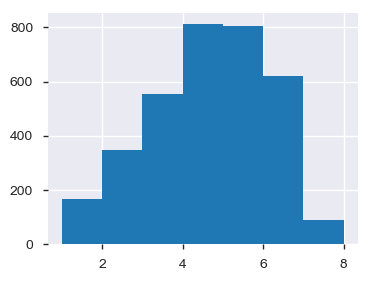

In [14]:
# ターゲットカラム集計
plt.figure(figsize=(4,3))
df['LeagueIndex'].hist(bins=7)
plt.show()

# 学習

In [15]:
target_col = 'LeagueIndex'
delete_col = ['GameID', 'LeagueIndex']

In [16]:
y = df[target_col]
y = y.values-1
X = df.drop(delete_col, axis=1)
X = X.astype('float16')
X_train, X_test, y_train, y_test = train_test_split(X, y)
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

In [17]:
# パラメータ設定
params = {
        'task': 'train',
        'boosting_type': 'gbdt',
        'objective': 'multiclass',
        'metric': {'multi_logloss'},
        'num_class': 8,
        'learning_rate': 0.1,
        'num_leaves': 10,
        'min_data_in_leaf': 3,
        'num_iteration': 200,
        'verbose': -1
}

In [18]:
# 学習
gbm = lgb.train(params,
    lgb_train,
    num_boost_round=100,
    valid_sets=lgb_eval,
    early_stopping_rounds=20
)

[1]	valid_0's multi_logloss: 2.0004
Training until validation scores don't improve for 20 rounds.
[2]	valid_0's multi_logloss: 1.93629
[3]	valid_0's multi_logloss: 1.87782
[4]	valid_0's multi_logloss: 1.82623
[5]	valid_0's multi_logloss: 1.78077
[6]	valid_0's multi_logloss: 1.74061
[7]	valid_0's multi_logloss: 1.70476
[8]	valid_0's multi_logloss: 1.67307
[9]	valid_0's multi_logloss: 1.64492
[10]	valid_0's multi_logloss: 1.61843
[11]	valid_0's multi_logloss: 1.59596
[12]	valid_0's multi_logloss: 1.57394
[13]	valid_0's multi_logloss: 1.55317
[14]	valid_0's multi_logloss: 1.53423
[15]	valid_0's multi_logloss: 1.51782
[16]	valid_0's multi_logloss: 1.50227
[17]	valid_0's multi_logloss: 1.48849
[18]	valid_0's multi_logloss: 1.47336
[19]	valid_0's multi_logloss: 1.4601
[20]	valid_0's multi_logloss: 1.44855
[21]	valid_0's multi_logloss: 1.43731
[22]	valid_0's multi_logloss: 1.42802
[23]	valid_0's multi_logloss: 1.41745
[24]	valid_0's multi_logloss: 1.40893
[25]	valid_0's multi_logloss: 1.40049

# 評価

In [19]:
# 予測
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
y_pred_max = np.argmax(y_pred, axis=1)

In [20]:
# 精度
accuracy_score(y_test, y_pred_max)

0.41460541813898705

In [21]:
# 評価レポート
target_names = ['League 0', 'League 1', 'League 2', 'League 3', 'League 4', 'League 5', 'League 6', 'League 7']
print(classification_report(y_test, y_pred_max, target_names=target_names))

              precision    recall  f1-score   support

    League 0       0.36      0.27      0.31        44
    League 1       0.33      0.33      0.33        79
    League 2       0.35      0.30      0.32       131
    League 3       0.39      0.39      0.39       208
    League 4       0.40      0.44      0.42       202
    League 5       0.51      0.55      0.53       166
    League 6       0.50      0.14      0.22         7
    League 7       1.00      1.00      1.00        12

   micro avg       0.41      0.41      0.41       849
   macro avg       0.48      0.43      0.44       849
weighted avg       0.41      0.41      0.41       849

